In [2]:
import numpy as np
import pandas as pd
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load datasets
df = pd.read_csv('India Mobility Workplaces.csv', index_col=0, parse_dates=True)
df.index.freq = 'D'
df.head()

,Cases,Mobility: Workplaces
Date,,
2020-03-02,2,0
2020-03-03,1,0
2020-03-04,22,3
2020-03-05,1,2
2020-03-06,2,3


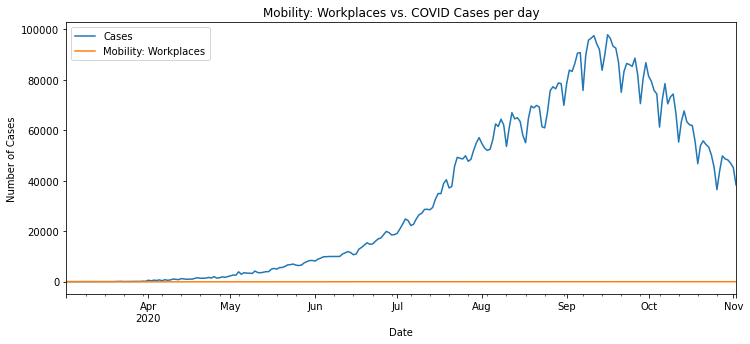

In [3]:
title = 'Mobility: Workplaces vs. COVID Cases per day'
ylabel='Number of Cases'
xlabel=''

ax = df['Cases'].plot(figsize=(12,5),title=title,legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
df['Mobility: Workplaces'].plot(legend=True);

In [4]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [5]:
adf_test(df['Cases'],title='Cases')

Augmented Dickey-Fuller Test: Cases
ADF test statistic       -1.763322
p-value                   0.398817
# lags used              15.000000
# observations          230.000000
critical value (1%)      -3.459106
critical value (5%)      -2.874190
critical value (10%)     -2.573512
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [6]:
adf_test(df['Mobility: Workplaces'], title='Mobility')

Augmented Dickey-Fuller Test: Mobility
ADF test statistic       -3.067775
p-value                   0.029032
# lags used              16.000000
# observations          229.000000
critical value (1%)      -3.459233
critical value (5%)      -2.874245
critical value (10%)     -2.573541
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [7]:
df_transformed = df.diff()

In [8]:
df_transformed = df_transformed.dropna()
adf_test(df_transformed['Cases'], title='CasesFirstDiff')
print()
adf_test(df_transformed['Mobility: Workplaces'], title='MobilityFirstDiff')

Augmented Dickey-Fuller Test: CasesFirstDiff
ADF test statistic       -2.124834
p-value                   0.234647
# lags used              16.000000
# observations          228.000000
critical value (1%)      -3.459361
critical value (5%)      -2.874302
critical value (10%)     -2.573571
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary

Augmented Dickey-Fuller Test: MobilityFirstDiff
ADF test statistic       -3.158585
p-value                   0.022511
# lags used              15.000000
# observations          229.000000
critical value (1%)      -3.459233
critical value (5%)      -2.874245
critical value (10%)     -2.573541
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [9]:
df_transformed = df_transformed.diff().dropna()
adf_test(df_transformed['Cases'], title='CasesSecondDiff')
print()
adf_test(df_transformed['Mobility: Workplaces'], title='MobilitySecondDiff')

Augmented Dickey-Fuller Test: CasesSecondDiff
ADF test statistic       -4.347048
p-value                   0.000368
# lags used              15.000000
# observations          228.000000
critical value (1%)      -3.459361
critical value (5%)      -2.874302
critical value (10%)     -2.573571
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary

Augmented Dickey-Fuller Test: MobilitySecondDiff
ADF test statistic     -5.938962e+00
p-value                 2.285036e-07
# lags used             1.400000e+01
# observations          2.290000e+02
critical value (1%)    -3.459233e+00
critical value (5%)    -2.874245e+00
critical value (10%)   -2.573541e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [10]:
nobs=7
train, test = df_transformed[0:-nobs], df_transformed[-nobs:]

In [11]:
from statsmodels.tsa.api import VAR
for i in range(31):
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 0
AIC:  21.18049325168155
BIC:  21.20975958198649

Order = 1
AIC:  20.694205535178714
BIC:  20.782269055645468

Order = 2
AIC:  20.108538771326078
BIC:  20.25575517618328

Order = 3
AIC:  19.9474447551584
BIC:  20.15417336889775

Order = 4
AIC:  19.903556625725294
BIC:  20.17016045475612

Order = 5
AIC:  19.806513068641355
BIC:  20.133358853885575

Order = 6
AIC:  18.697006518937982
BIC:  19.08446478938632

Order = 7
AIC:  18.521132955066726
BIC:  18.96957808231758

Order = 8
AIC:  18.465217636932845
BIC:  18.975027890735657

Order = 9
AIC:  18.487717528176724
BIC:  19.059275133002465

Order = 10
AIC:  18.50615875923099
BIC:  19.139849951892746

Order = 11
AIC:  18.486355901379735
BIC:  19.182570989727193

Order = 12
AIC:  18.4961750582971
BIC:  19.255308481009195

Order = 13
AIC:  18.41329383989033
BIC:  19.2357442273911

Order = 14
AIC:  18.417286108891716
BIC:  19.303456345414975

Order = 15
AIC:  18.429804566904767
BIC:  19.38010185373396

Order = 16
AIC:  18.37211683023241

In [12]:
results = model.fit(8)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 02, Dec, 2020
Time:                     13:05:09
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    18.9750
Nobs:                     229.000    HQIC:                   18.6709
Log likelihood:          -2730.14    FPE:                1.04612e+08
AIC:                      18.4652    Det(Omega_mle):     9.06527e+07
--------------------------------------------------------------------
Results for equation Cases
                             coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------
const                         -80.432135       142.186480           -0.566           0.572
L1.Cases                       -1.286786         0.067758          -18.991           0.000
L1.Mobility: Workpla

In [13]:
lag_order = results.k_ar
lag_order

8

In [14]:
z = results.forecast(y=train.values[-lag_order:], steps=7)
z

array([[ 1.38255728e+04,  9.14942891e+00],
       [-2.64515213e+03, -2.61058021e+00],
       [-4.41908007e+03, -2.05088967e+00],
       [ 7.30852886e+02,  8.73066760e-01],
       [-1.83283487e+03,  2.75802865e-01],
       [-2.47438874e+03,  7.82879620e-01],
       [-1.19801990e+03, -1.50435607e+00]])

In [15]:
test

,Cases,Mobility: Workplaces
Date,,
2020-10-27,16101.0,9.0
2020-10-28,-1435.0,-2.0
2020-10-29,-7221.0,-3.0
2020-10-30,853.0,0.0
2020-10-31,-925.0,2.0
2020-11-01,-427.0,5.0
2020-11-02,-5189.0,-8.0


In [16]:
idx = pd.date_range('27/10/2020', periods=7, freq='D')
df_forecast = pd.DataFrame(z, index=idx, columns=['Cases2d','Mobility2d'])
df_forecast

,Cases2d,Mobility2d
2020-10-27,13825.572850,9.149429
2020-10-28,-2645.152134,-2.610580
2020-10-29,-4419.080073,-2.050890
2020-10-30,730.852886,0.873067
2020-10-31,-1832.834868,0.275803
2020-11-01,-2474.388742,0.782880
2020-11-02,-1198.019897,-1.504356


In [17]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Cases1d'] = (df['Cases'].iloc[-nobs-1]-df['Cases'].iloc[-nobs-2]) + df_forecast['Cases2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['CasesForecast'] = df['Cases'].iloc[-nobs-1] + df_forecast['Cases1d'].cumsum()

In [18]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Mobility1d'] = (df['Mobility: Workplaces'].iloc[-nobs-1]-df['Mobility: Workplaces'].iloc[-nobs-2]) + df_forecast['Mobility2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['MobilityForecast'] = df['Mobility: Workplaces'].iloc[-nobs-1] + df_forecast['Mobility1d'].cumsum()

In [19]:
df_forecast

,Cases2d,Mobility2d,Cases1d,CasesForecast,Mobility1d,MobilityForecast
2020-10-27,13825.572850,9.149429,5147.572850,41617.572850,3.149429,-17.850571
2020-10-28,-2645.152134,-2.610580,2502.420716,44119.993565,0.538849,-17.311722
2020-10-29,-4419.080073,-2.050890,-1916.659357,42203.334208,-1.512041,-18.823763
2020-10-30,730.852886,0.873067,-1185.806471,41017.527737,-0.638974,-19.462738
2020-10-31,-1832.834868,0.275803,-3018.641339,37998.886398,-0.363171,-19.825909
2020-11-01,-2474.388742,0.782880,-5493.030081,32505.856316,0.419708,-19.406201
2020-11-02,-1198.019897,-1.504356,-6691.049978,25814.806338,-1.084648,-20.490848


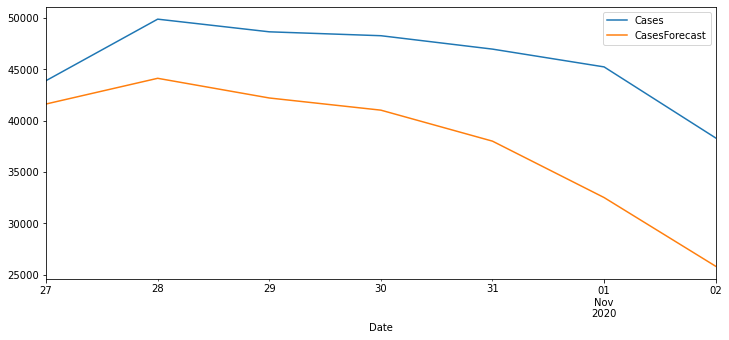

In [20]:
df['Cases'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['CasesForecast'].plot(legend=True);